In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
import math
from math import *
from scipy import special

In [3]:
data1 = pd.read_excel('cyexcel.xlsx',sheet_name = 'Sheet1')
data2 = pd.read_excel('cyexcel.xlsx',sheet_name = 'Sheet2')

In [4]:
data2

,Time,Np,Rp,Bo,Rs,Bg
0,0,NaN,650,1.404,650,0.00093
1,1,7.88,760,1.374,592,0.00098
2,2,18.42,845,1.349,545,0.00107
3,3,29.15,920,1.329,507,0.00117
4,4,40.69,975,1.316,471,0.00128
5,5,50.14,1025,1.303,442,0.00139
6,6,58.42,1065,1.294,418,0.00150
7,7,65.39,1095,1.287,398,0.00160
8,8,70.74,1120,1.280,383,0.00170
9,9,74.54,1145,1.276,381,0.00176


In [5]:
data1

,Time,Pressure OWC(psia),Plateau pressure (psia),delta p
0,0,2740,NaN,120.0
1,1,2500,2620.0,225.0
2,2,2290,2395.0,196.0
3,3,2109,2199.0,170.0
4,4,1949,2029.0,146.0
5,5,1818,1883.0,123.0
6,6,1702,1760.0,105.0
7,7,1608,1655.0,84.0
8,8,1635,1571.0,64.0
9,9,1480,1507.0,47.0


In [6]:
data1 = data1.set_index('Time')

In [7]:
data2 = data2.set_index('Time')

In [8]:
df = data1.join(data2,how = 'left')

In [9]:
df

,Pressure OWC(psia),Plateau pressure (psia),delta p,Np,Rp,Bo,Rs,Bg
Time,,,,,,,,
0,2740,NaN,120.0,NaN,650,1.404,650,0.00093
1,2500,2620.0,225.0,7.88,760,1.374,592,0.00098
2,2290,2395.0,196.0,18.42,845,1.349,545,0.00107
3,2109,2199.0,170.0,29.15,920,1.329,507,0.00117
4,1949,2029.0,146.0,40.69,975,1.316,471,0.00128
5,1818,1883.0,123.0,50.14,1025,1.303,442,0.00139
6,1702,1760.0,105.0,58.42,1065,1.294,418,0.00150
7,1608,1655.0,84.0,65.39,1095,1.287,398,0.00160
8,1635,1571.0,64.0,70.74,1120,1.280,383,0.00170


In [10]:


def tde(t):
    k = 200
    phi = 0.25
    mew = 0.55
    c = 7 * 10**(-6)
    ro = 9200
    
    return (2.309*k*t)/(phi*mew*c*ro**2)
    
    
    
    

In [11]:
df.reset_index(inplace = True)

In [12]:
df['tde'] = df['Time'].apply(tde)

In [13]:
df

,Time,Pressure OWC(psia),Plateau pressure (psia),delta p,Np,Rp,Bo,Rs,Bg,tde
0,0,2740,NaN,120.0,NaN,650,1.404,650,0.00093,0.000000
1,1,2500,2620.0,225.0,7.88,760,1.374,592,0.00098,5.668622
2,2,2290,2395.0,196.0,18.42,845,1.349,545,0.00107,11.337245
3,3,2109,2199.0,170.0,29.15,920,1.329,507,0.00117,17.005867
4,4,1949,2029.0,146.0,40.69,975,1.316,471,0.00128,22.674490
5,5,1818,1883.0,123.0,50.14,1025,1.303,442,0.00139,28.343112
6,6,1702,1760.0,105.0,58.42,1065,1.294,418,0.00150,34.011735
7,7,1608,1655.0,84.0,65.39,1095,1.287,398,0.00160,39.680357
8,8,1635,1571.0,64.0,70.74,1120,1.280,383,0.00170,45.348980
9,9,1480,1507.0,47.0,74.54,1145,1.276,381,0.00176,51.017602


## Global Variables

In [14]:
k = 200
phi = 0.25
mew = 0.55
c = 7 * 10**(-6)
ro = 9200
h = 100
Bw = 1.0
cf = 4 *10**(-6)
cw = 3 * 10**(-6)
f = 140/360

N = 312 * 10**6
Swc = 0.05

In [15]:
U = 1.119 *f* phi *h*c*ro**2

In [16]:
U

6445.688666666666

In [17]:
def qde(tde,rD): 
    tD = tde
    #for alpha 1
    b0 = -0.00222107
    b1 = -0.627638
    b2 = 6.277915
    b3 = -2.734405
    b4 = 1.2708
    b5 = -1.100417
    a1 = b0+b1*csch(rD)+b2*(rD**b3)+b4*(rD**b5)

    
    #for alpha 2
    b0 = -0.00796608
    b1 = -1.85408
    b2 = 18.71169
    b3 = -2.758326
    b4 = 4.829162
    b5 = -1.009021
    a2 = b0+b1*csch(rD) +b2*(rD**b3)+b4*(rD**b5)

    
    #Calculate qD
    bes_0_1 = special.j0(a1)
    bes_1_1 = special.j1(a1*rD)
    bes_0_2 = special.j0(a2)
    bes_1_2 = special.j1(a2*rD)
    qD1 = ((rD**2)-1)/2
    qD2 = (2*math.e**((-a1**2)*tD) *bes_1_1**2) / ((a1**2)*bes_0_1**2 - bes_1_1**2)

    qD3 = (2*math.e**((-a2**2)*tD) *(bes_1_2)**2) / ( (a1**2)*(bes_0_2**2)- bes_1_2**2) 
    qD = qD1 - qD2 - qD3
    
    return qD                                         

In [18]:
def csch(rD) :
    return 2/((e**rD)-(e**-rD))

In [19]:
def qde_assist(tde):
    return qde(tde,5)

In [20]:
df['Wd'] = df['tde'].apply(qde_assist)

In [21]:
df

,Time,Pressure OWC(psia),Plateau pressure (psia),delta p,Np,Rp,Bo,Rs,Bg,tde,Wd
0,0,2740,NaN,120.0,NaN,650,1.404,650,0.00093,0.000000,17.887659
1,1,2500,2620.0,225.0,7.88,760,1.374,592,0.00098,5.668622,13.718502
2,2,2290,2395.0,196.0,18.42,845,1.349,545,0.00107,11.337245,13.091647
3,3,2109,2199.0,170.0,29.15,920,1.329,507,0.00117,17.005867,12.694263
4,4,1949,2029.0,146.0,40.69,975,1.316,471,0.00128,22.674490,12.441536
5,5,1818,1883.0,123.0,50.14,1025,1.303,442,0.00139,28.343112,12.280808
6,6,1702,1760.0,105.0,58.42,1065,1.294,418,0.00150,34.011735,12.178588
7,7,1608,1655.0,84.0,65.39,1095,1.287,398,0.00160,39.680357,12.113578
8,8,1635,1571.0,64.0,70.74,1120,1.280,383,0.00170,45.348980,12.072233
9,9,1480,1507.0,47.0,74.54,1145,1.276,381,0.00176,51.017602,12.045939


In [22]:
b0 = -1.767
b1 = -0.606
b2 = 0.12368
b3 = 3.02
b4 = 2.25
b5 = 0.5
rD = 5
tcross = b0+b1*rD+b2*((rD)**b4)+b3*(math.log(rD))**b5
tcross

3.657899879898163

In [23]:
# for tD < 0.01
# qD = (2/SQRT(pi))(SQRT(tD))

# for 0.01-< tD <200
def new_qde(tD):
    qD = None
    if tD < 200 and 0.01<tD:
        b0 = 1.129552
        b1 = 1.160436
        b2 = 0.2642821
        b3 = 0.01131791
        b4 = 0.5900113
        b5 = 0.04589742
        b6 = 1.00
        b7 = 0.5002034
        b8 = 1.500
        b9 = 1.979139

        qD = (b0*(tD**b7)+b1*(tD)+b2*(tD**b8)+b3*(tD**b9))/(b4*(tD**b7)+b5*(tD)+b6)

    elif tD< 0.01:
        qD = (2 * tD**0.5)/math.pi ** 0.5
        
        
    #for 200-<tD<2.0*10^12
    elif tD< 2*10**12 and tD>= 200 :
        b0 = 4.39880
        b1 = 0.43693
        b2 = -4.16078
        b3 = 0.090
        qD = 10**(b0+b1* math.log(tD)+b2*((math.log(tD))**b3) )
                  
    return qD

In [24]:
df['new Wd'] = df['tde'].apply(new_qde)

In [25]:
new_qde(0)

0.0

In [26]:
df

,Time,Pressure OWC(psia),Plateau pressure (psia),delta p,Np,Rp,Bo,Rs,Bg,tde,Wd,new Wd
0,0,2740,NaN,120.0,NaN,650,1.404,650,0.00093,0.000000,17.887659,0.000000
1,1,2500,2620.0,225.0,7.88,760,1.374,592,0.00098,5.668622,13.718502,4.947044
2,2,2290,2395.0,196.0,18.42,845,1.349,545,0.00107,11.337245,13.091647,8.105237
3,3,2109,2199.0,170.0,29.15,920,1.329,507,0.00117,17.005867,12.694263,10.916680
4,4,1949,2029.0,146.0,40.69,975,1.316,471,0.00128,22.674490,12.441536,13.536980
5,5,1818,1883.0,123.0,50.14,1025,1.303,442,0.00139,28.343112,12.280808,16.029348
6,6,1702,1760.0,105.0,58.42,1065,1.294,418,0.00150,34.011735,12.178588,18.427400
7,7,1608,1655.0,84.0,65.39,1095,1.287,398,0.00160,39.680357,12.113578,20.751715
8,8,1635,1571.0,64.0,70.74,1120,1.280,383,0.00170,45.348980,12.072233,23.016056
9,9,1480,1507.0,47.0,74.54,1145,1.276,381,0.00176,51.017602,12.045939,25.230205


In [27]:
U

6445.688666666666

In [28]:
def wde(df):
    for i in range(1,len(df)):
        wde = 0
        for j in range(i):
            wde += (df.loc[j,'delta p'] * df.loc[i-j,'new Wd']   )
        df.loc[i,'wde'] = U * wde
    return df

In [29]:
cols = df.columns[12:]

In [38]:
df = wde(df)

In [39]:
df

,Time,Pressure OWC(psia),Plateau pressure (psia),delta p,Np,Rp,Bo,Rs,Bg,tde,Wd,new Wd,F,Eo,f\eo,wde
0,0,2740,NaN,120.0,NaN,650,1.404,650,0.00093,0.000000,17.887659,0.000000,NaN,0.00000,NaN,NaN
1,1,2500,2620.0,225.0,7.88,760,1.374,592,0.00098,5.668622,13.718502,4.947044,12.124483,0.02684,451.731863,3.826453e+06
2,2,2290,2395.0,196.0,18.42,845,1.349,545,0.00107,11.337245,13.091647,8.105237,30.761400,0.05735,536.380122,1.344386e+07
3,3,2109,2199.0,170.0,29.15,920,1.329,507,0.00117,17.005867,12.694263,10.916680,52.825921,0.09231,572.266510,2.644860e+07
4,4,1949,2029.0,146.0,40.69,975,1.316,471,0.00128,22.674490,12.441536,13.536980,79.797973,0.14112,565.461825,4.196346e+07
5,5,1818,1883.0,123.0,50.14,1025,1.303,442,0.00139,28.343112,12.280808,16.029348,105.964372,0.18812,563.280735,5.935944e+07
6,6,1702,1760.0,105.0,58.42,1065,1.294,418,0.00150,34.011735,12.178588,18.427400,132.292090,0.23800,555.849118,7.811418e+07
7,7,1608,1655.0,84.0,65.39,1095,1.287,398,0.00160,39.680357,12.113578,20.751715,157.079858,0.28620,548.846464,9.790762e+07
8,8,1635,1571.0,64.0,70.74,1120,1.280,383,0.00170,45.348980,12.072233,23.016056,179.177346,0.32990,543.126238,1.183014e+08
9,9,1480,1507.0,47.0,74.54,1145,1.276,381,0.00176,51.017602,12.045939,25.230205,195.342506,0.34544,565.488958,1.389385e+08


In [40]:
df['F'] = df['Np']*(df['Bo']+(df['Rp']-df['Rs'])*df['Bg'])

In [41]:
## np(bo+(rp-rs)*bg)
##E0 = ((b0-boi)+(rsi - rs)*bg)

In [42]:
df['Eo'] = (df['Bo']-df.loc[0,'Bo'])+(df.loc[0,'Rs'] - df['Rs'])*df['Bg']

In [43]:
df[df.columns[-2:]]

,f\eo,wde
0,NaN,NaN
1,451.731863,3.826453e+06
2,536.380122,1.344386e+07
3,572.266510,2.644860e+07
4,565.461825,4.196346e+07
5,563.280735,5.935944e+07
6,555.849118,7.811418e+07
7,548.846464,9.790762e+07
8,543.126238,1.183014e+08
9,565.488958,1.389385e+08


In [44]:
df.columns

Index(['Time', 'Pressure OWC(psia)', 'Plateau pressure (psia)', 'delta p',
       'Np', 'Rp', 'Bo', 'Rs', 'Bg', 'tde', 'Wd', 'new Wd', 'F', 'Eo', 'f\eo',
       'wde'],
      dtype='object')

In [45]:
df['f\eo'] = df['F']/df['Eo']
df['wd/eo'] = df['wde']/df['Eo']

In [46]:
df[df.columns[-6:]]

,new Wd,F,Eo,f\eo,wde,wd/eo
0,0.000000,NaN,0.00000,NaN,NaN,NaN
1,4.947044,12.124483,0.02684,451.731863,3.826453e+06,1.425653e+08
2,8.105237,30.761400,0.05735,536.380122,1.344386e+07,2.344178e+08
3,10.916680,52.825921,0.09231,572.266510,2.644860e+07,2.865193e+08
4,13.536980,79.797973,0.14112,565.461825,4.196346e+07,2.973601e+08
5,16.029348,105.964372,0.18812,563.280735,5.935944e+07,3.155403e+08
6,18.427400,132.292090,0.23800,555.849118,7.811418e+07,3.282108e+08
7,20.751715,157.079858,0.28620,548.846464,9.790762e+07,3.420951e+08
8,23.016056,179.177346,0.32990,543.126238,1.183014e+08,3.585978e+08
9,25.230205,195.342506,0.34544,565.488958,1.389385e+08,4.022074e+08


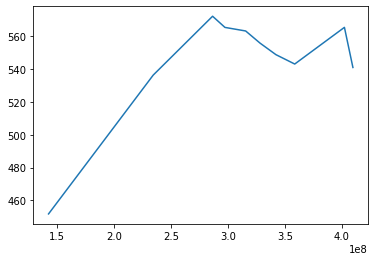

In [47]:
plt.plot(df['wd/eo'],df['f\eo'])